# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [5]:
employee = pd.read_csv('/Users/nferrari/Documents/IronHack/Git-repo/lab-pivot-table-and-correlation/your_code/data/Employee.csv')
employee.head()


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [6]:
# Method 1: grouping by
employee.groupby(['Department']).agg({'Salary':'mean'})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [10]:
# Method 2: pivoting
employee.pivot_table(index=['Department'])

,Salary,Years
Department,,
HR,45.00,4.666667
IT,48.75,4.500000
Sales,55.00,2.500000


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [21]:
employee.pivot_table(index=['Department','Title'], values =['Salary'],aggfunc =['mean'])

mean
                     Salary
Department Title           
HR         VP          70.0
           analyst     32.5
IT         VP          70.0
           analyst     32.5
           associate   60.0
Sales      associate   55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [46]:
employee.pivot_table(index=['Department','Title','Years'], values =['Salary'],aggfunc =['mean'])

mean
                           Salary
Department Title     Years       
HR         VP        8         70
           analyst   2         30
                     4         35
IT         VP        8         70
           analyst   1         35
                     2         30
           associate 7         60
Sales      associate 2         55
                     3         55

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [48]:
employee.pivot_table(index= ['Department','Title'], values = ['Name','Salary'], aggfunc = {'Name':'nunique','Salary':'mean'})


Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [50]:
data_missing = employee.pivot_table(index= ['Department','Title'], aggfunc = {'median','max','min','std'})

#we can see how all the aggregated functions worked except for std, probably this is due to NaN in the dataset given that for VP for example there is only one case

#### Based on your comments, fill the missing values with an appropriate value.

In [51]:
data_missing = data_missing.fillna(0)
data_missing.head()

Salary                        Years                      
                        max median   min       std   max median  min       std
Department Title                                                              
HR         VP          70.0   70.0  70.0  0.000000   8.0    8.0  8.0  0.000000
           analyst     35.0   32.5  30.0  3.535534   4.0    3.0  2.0  1.414214
IT         VP          70.0   70.0  70.0  0.000000   8.0    8.0  8.0  0.000000
           analyst     35.0   32.5  30.0  3.535534   2.0    1.5  1.0  0.707107
           associate   60.0   60.0  60.0  0.000000   7.0    7.0  7.0  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [52]:
employee.pivot_table(index= ['Department'], values = ['Name','Salary'], aggfunc = {'Name':'nunique','Salary':'sum'})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [54]:
employee.pivot_table(index= ['Department','Title'], values = ['Years','Salary'], aggfunc = {'Years':'sum','Salary':'sum'})

Salary  Years
Department Title                   
HR         VP             70      8
           analyst        65      6
IT         VP             70      8
           analyst        65      3
           associate      60      7
Sales      associate     110      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
#damn


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [57]:
fitbit = pd.read_csv('/Users/nferrari/Documents/IronHack/Git-repo/lab-pivot-table-and-correlation/your_code/data/Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [58]:
# Check for descriptive statistics
fitbit.describe().T

,count,mean,std,min,25%,50%,75%,max
Calorie burned,367.0,2741.501362,916.307036,179.000,2698.000,2974.00,3233.00,4351.00
Steps,367.0,10121.588556,5594.836225,0.000,6730.500,10413.00,13916.50,26444.00
Distance,367.0,8.549128,3.409881,0.000,6.155,8.29,10.56,20.45
Floors,367.0,11.724796,10.337370,0.000,5.000,11.00,16.00,101.00
Minutes Sedentary,367.0,563.934482,294.793145,1.002,520.000,663.00,756.50,998.00
Minutes Lightly Active,367.0,236.405995,86.531376,0.000,179.000,226.00,290.00,472.00
Minutes Fairly Active,367.0,26.163488,20.319456,0.000,8.000,24.00,41.50,101.00
Minutes Very Active,367.0,35.722071,31.006682,0.000,10.500,29.00,54.00,153.00
Activity Calories,367.0,2044.147139,2041.267168,0.000,1218.500,1553.00,1927.50,9830.00
MinutesOfSleep,367.0,290.479564,154.752328,0.000,224.000,337.00,400.50,553.00


In [61]:
# Check for variables types
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

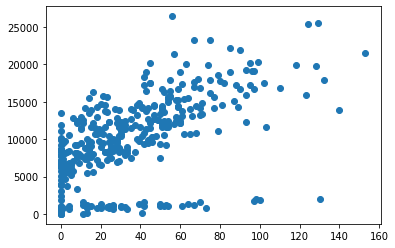

In [72]:
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.show()

In [76]:
correlation_nr = fitbit.corr()
print(correlation_nr)

                        Calorie burned     Steps  Distance    Floors  \
Calorie burned                1.000000  0.255305  0.292790  0.130757   
Steps                         0.255305  1.000000  0.779678  0.306511   
Distance                      0.292790  0.779678  1.000000  0.382940   
Floors                        0.130757  0.306511  0.382940  1.000000   
Minutes Sedentary             0.125353  0.076906  0.160632  0.057812   
Minutes Lightly Active        0.209540  0.393010  0.455272 -0.085992   
Minutes Fairly Active         0.188256  0.303244  0.348113  0.278408   
Minutes Very Active           0.197881  0.571452  0.759310  0.399503   
Activity Calories            -0.130758 -0.160568 -0.246853 -0.155532   
MinutesOfSleep                0.011485  0.130986  0.129442  0.069464   
MinutesOfBeingAwake           0.041999  0.124846  0.130447  0.064587   
NumberOfAwakings              0.030490  0.106591  0.091095  0.043459   
LengthOfRestInMinutes         0.017460  0.133405  0.134550  0.07

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

#### What can you say about Minute Very Active and Steps? Write a comment below

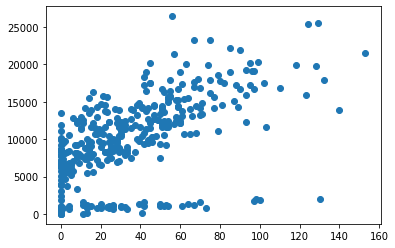

In [78]:
# Scatter plot correlation value is at 0.571452: I would say the correlation exists, and it is decently strong.
# In addition, the Scatterplot shows a good relationship as the unique points align to an extent, consistenly, around a straight line
# FInally, it's fair to say that the relationship is somewhat positive, as the hypothetical line connecting the dots has a positive slope

plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.show()

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [ ]:
# Correlation matrix run in the above section
# Correlation coeff = 0.076906
# The correlation coefficient implicates that the relationships between the two variables is very weak on a first appereance. 
# It's important to run a scatterplot to check further and draw conclusions

# Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

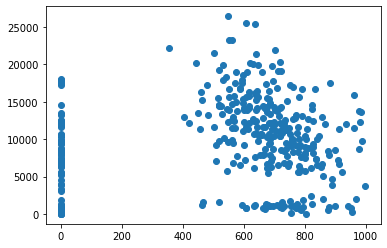

In [77]:
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])
plt.show()

# The scatterplot highlights two key points: 
# 1) The correlation is clearly negative. Intuitively, the higher your Sedentary minutes are, the less steps are taken.
# 2) The correlation is not very strong. The unique points are quite scattered and coefficient is definitely influenced by the amount of 0s 

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [ ]:
# Correlation matrix above, coeff relations = 0.011485
# The coefficient indicates an extremely low correlation between the two variables. 
# Intuitively, this is due to the fact that when a person sleeps it can't make any steps. Therefore, all the points in the graph are scattered.

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

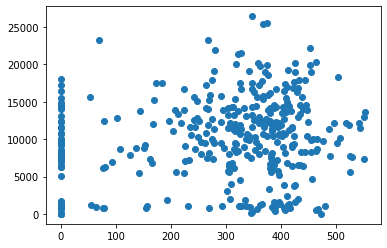

In [80]:
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])
plt.show()

# the scatterplot clearly highlights the absence of a relationship between the two variables. 
# All the unique points are not connected in the shape of a line. This indicates an absence of relationship.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [82]:
cor_fit = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]
cor_fit.head()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407


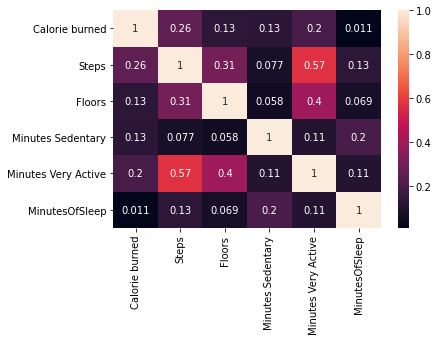

In [83]:
correlations_cor_fit = cor_fit.corr()
sns.heatmap(correlations_cor_fit, annot=True)
plt.show()

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [92]:
sorted_mat = correlations_cor_fit.unstack().sort_values()
  
print(sorted_mat)

MinutesOfSleep       Calorie burned         0.011485
Calorie burned       MinutesOfSleep         0.011485
Minutes Sedentary    Floors                 0.057812
Floors               Minutes Sedentary      0.057812
                     MinutesOfSleep         0.069464
MinutesOfSleep       Floors                 0.069464
Steps                Minutes Sedentary      0.076906
Minutes Sedentary    Steps                  0.076906
Minutes Very Active  Minutes Sedentary      0.105963
Minutes Sedentary    Minutes Very Active    0.105963
MinutesOfSleep       Minutes Very Active    0.108018
Minutes Very Active  MinutesOfSleep         0.108018
Calorie burned       Minutes Sedentary      0.125353
Minutes Sedentary    Calorie burned         0.125353
Floors               Calorie burned         0.130757
Calorie burned       Floors                 0.130757
Steps                MinutesOfSleep         0.130986
MinutesOfSleep       Steps                  0.130986
Minutes Very Active  Calorie burned         0.

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [93]:
time_grades = pd.read_csv('/Users/nferrari/Documents/IronHack/Git-repo/lab-pivot-table-and-correlation/your_code/data/Time_Grades.csv')
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [ ]:
# your answer here


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [ ]:
# your answer here


#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here
